# Latency Graphs

In [1]:
# !pip3 install matplotlib pandas
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
%matplotlib inline

7911244 7911202


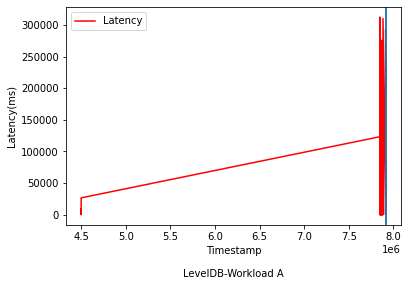

In [57]:
# LevelDB

level_df = pd.read_csv("/home/shaanzie/Desktop/YCSB_lsmt/latency.csv")

compact_time = []
with open("/home/shaanzie/Desktop/YCSB_lsmt/leveldb_database/LOG", "r") as compact_file:
    for line in compact_file.readlines():
        if("compacted" in line or "Compacting" in line):
            inp = line.split(" ")[0]
            compact_time.append(inp.split("-")[1])

def find_time(time):
    f = time.split(".")[0]
    try:
        s = str(time.split(".")[1])[:2]
    except IndexError:
        s = 0
    hours = int(f.split(":")[0])*60*60*100
    mins = int(f.split(":")[1])*60*100
    sec = int(f.split(":")[2])*100
    return hours + mins + sec + int(s)

timestamps =[]
for index, row in level_df.iterrows():
    timestamps.append(find_time(row['Timestamp']))

timestamps.sort()
print(timestamps[-1], find_time(compact_time[0]))
    
plt.plot(timestamps,level_df['Latency'], label='Latency', color='r')
for i in compact_time:
    plt.axvline(find_time(i))
plt.xlabel("Timestamp\n\nLevelDB-Workload A")
plt.ylabel("Latency(ms)")
plt.legend()
plt.savefig("/home/shaanzie/Desktop/LSMTProject/LevelDB-WorkloadA.png")
plt.show()

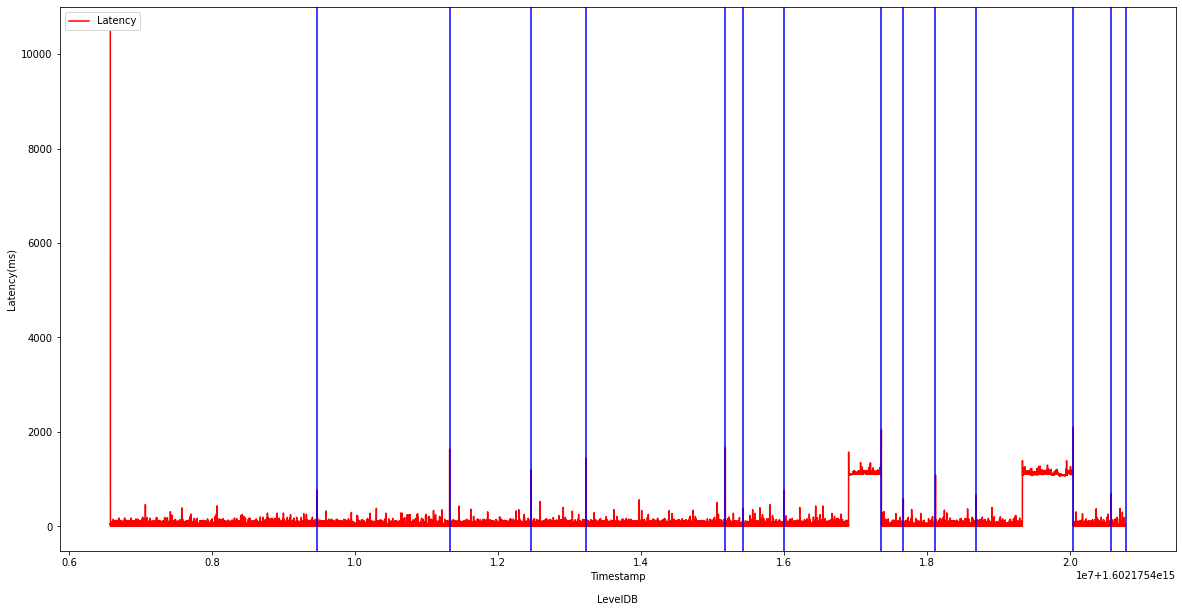

In [46]:
# LevelDB

level_df = pd.read_csv("/home/shaanzie/leveldb-results/leveldb-fillrandom-latency.csv", names=['Timestamp', 'Latency'])

compact_done_time = []
compact_start_time = []

with open("/home/shaanzie/leveldb-results/LOG", "r") as compact_file:
    for line in compact_file.readlines():
        if("compacted" in line):
            inp = line.split(";")[0]
            compact_done_time.append(int(inp))
#         if("Compacting" in line):
#             inp = line.split(";")[0]
#             compact_start_time.append(int(inp))
            
plt.figure(figsize=(20,10))
plt.plot(level_df['Timestamp'],level_df['Latency'], label='Latency', color='r')
for xc in compact_done_time:
    plt.axvline(x=xc, color='b')
# for xc in compact_start_time:
#     plt.axvline(x=xc, color='g')
plt.xlabel("Timestamp\n\nLevelDB")
plt.ylabel("Latency(ms)")
plt.legend()
plt.savefig("/home/shaanzie/Desktop/LSMTProject/LevelDB.png")
plt.show()

Index(['# hostname', 'interval', 'timestamp', 'CPU', '%usr', '%nice', '%sys',
       '%iowait', '%steal', '%irq', '%soft', '%guest', '%gnice', '%idle[...]',
       'kbmemfree', 'kbavail', 'kbmemused', '%memused', 'kbbuffers',
       'kbcached', 'kbcommit', '%commit', 'kbactive', 'kbinact', 'kbdirty',
       'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl', 'kbvmused'],
      dtype='object')


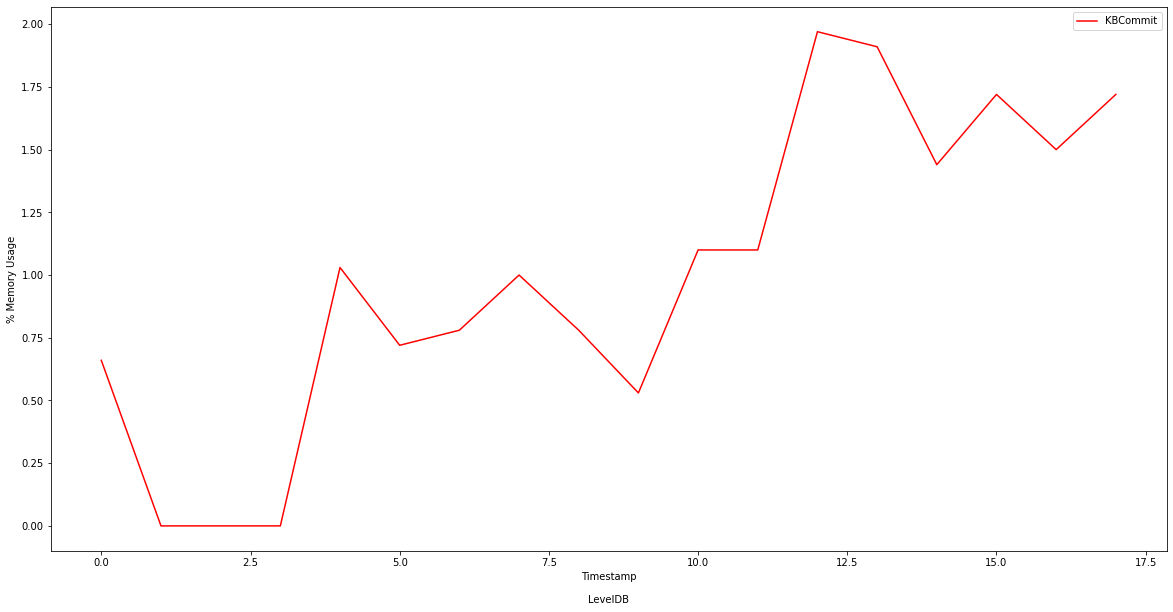

In [61]:
# LevelDB

level_df = pd.read_csv("/home/shaanzie/leveldb-results/sar_leveldb-fillrandom.csv")
print(level_df.columns)
plt.figure(figsize=(20,10))
plt.plot(level_df['%iowait'], label='KBCommit', color='r')
plt.xlabel("Timestamp\n\nLevelDB")
plt.ylabel("% Memory Usage")
plt.legend()
# plt.savefig("/home/shaanzie/Desktop/LSMTProject/LevelDB.png")
plt.show()